In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt


def visualize_binary(x, y, y_pred, model):
    x_min, x_max = x[:, 0].min().item() - 1, x[:, 0].max().item() + 1
    y_min, y_max = x[:, 1].min().item() - 1, x[:, 1].max().item() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))
    grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)
    Z = model(grid).detach().numpy().reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y.squeeze(), edgecolors="k",alpha=0.5,s=500)
    plt.scatter(x[:, 0], x[:, 1], c=y_pred.squeeze(), edgecolors="k",alpha=0.5,s = 500,marker='s')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Binary Classification")
    plt.show()

In [3]:
epochs = 5000

x = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

x = torch.tensor(x, dtype=torch.float32)

In [4]:
linear_1 = nn.Linear(2,5)
sigmoid_1 = nn.Sigmoid()
linear_2 = nn.Linear(5,1)
sigmoid_2 = nn.Sigmoid()

model = nn.Sequential(
    linear_1,
    sigmoid_1,
    linear_2,
    sigmoid_2,
    )

0.7297243475914001
0.0032836704049259424
0.0013396197464317083
0.0008158755372278392
0.0005790387513116002


/opt/homebrew/anaconda3/envs/torch/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


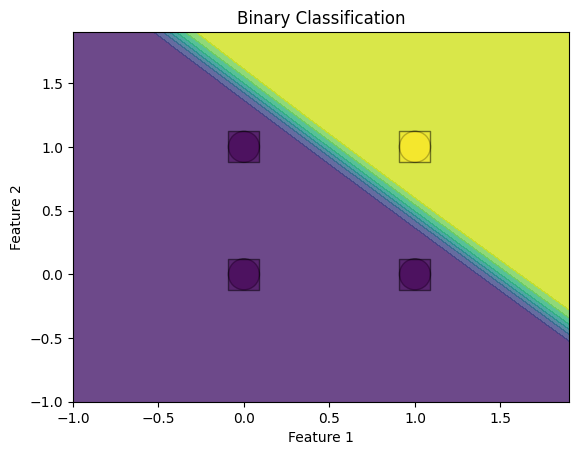

In [5]:
# AND
y = [[0],[0],[0],[1]]
y = torch.tensor(y,dtype=torch.float32)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 1)

for _ in range(epochs):
    # 초기화
    optimizer.zero_grad()
    
    # 예측
    y_pred = model(x)

    # 비용함수
    loss = criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    if _ % 1000 == 0 :
        print(f"{loss}")
y_pred=(model(x) > 0.5).to(torch.int)
visualize_binary(x,y,y_pred,model)

9.08639907836914
0.0033207666128873825
0.001447960501536727
0.0009066369384527206
0.0006539003807120025


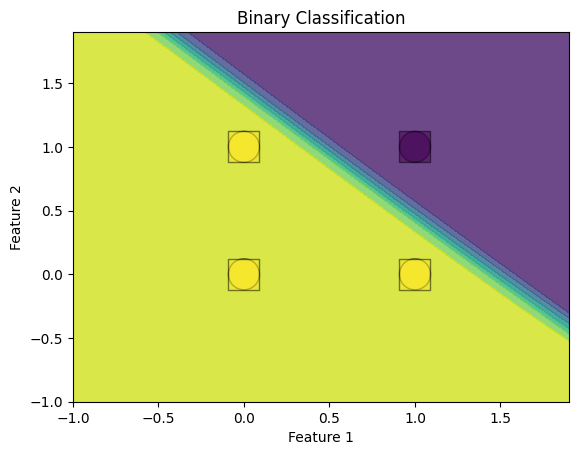

In [6]:
# NAND
y = [[1],[1],[1],[0]]
y = torch.tensor(y,dtype=torch.float32)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 1)

for _ in range(epochs):
    # 초기화
    optimizer.zero_grad()
    
    # 예측
    y_pred = model(x)

    # 비용함수
    loss = criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    if _ % 1000 == 0 :
        print(f"{loss}")

y_pred=(model(x) > 0.5).to(torch.int)
visualize_binary(x,y,y_pred,model)

4.832485675811768
0.585233211517334
0.5661157965660095
0.12138368934392929
0.035956040024757385


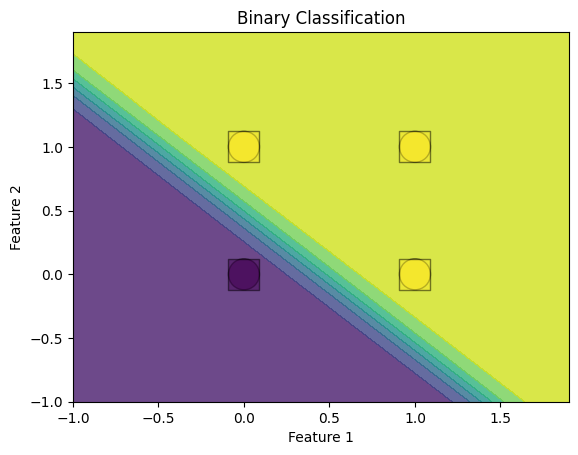

In [7]:
# OR
y = [[0],[1],[1],[1]]
y = torch.tensor(y,dtype=torch.float32)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

for _ in range(epochs):
    # 초기화
    optimizer.zero_grad()
    
    # 예측
    y_pred = model(x)

    # 비용함수
    loss = criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    if _ % 1000 == 0 :
        print(f"{loss}")

y_pred=(model(x) > 0.5).to(torch.int)
visualize_binary(x,y,y_pred,model)

1.2226181030273438
0.4818016290664673
0.07491661608219147
0.033992212265729904
0.024284813553094864


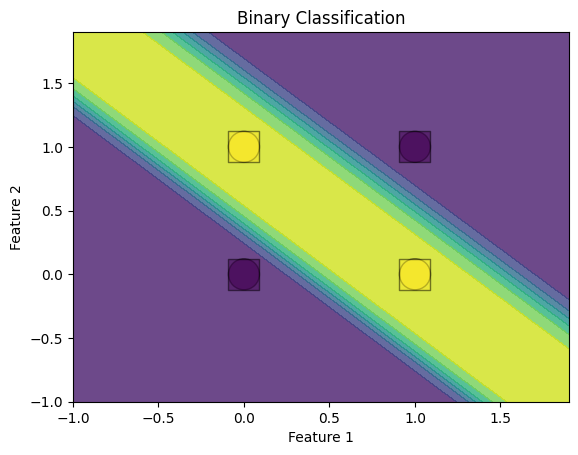

In [8]:
# XOR
y = [[0],[1],[1],[0]]
y = torch.tensor(y,dtype=torch.float32)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)
for _ in range(epochs):
    # 초기화
    optimizer.zero_grad()
    
    # 예측
    y_pred = model(x)

    # 비용함수
    loss = criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    if _ % 1000 == 0 :
        print(f"{loss}")

y_pred=(model(x) > 0.5).to(torch.int)
visualize_binary(x,y,y_pred,model)

In [9]:
y_pred

tensor([[0],
        [1],
        [1],
        [0]], dtype=torch.int32)